# TICKET CLASSIFICATION

### This project shows how to create a model for text analysis and classification and deploy order to automatically classify support tickets. This will streamline routing tickets process to correct team members


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.neighbors.base import KNeighborsMixin
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from xgboost import plot_tree
import graphviz
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaam8004\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaam8004\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Reading Ticket Data into a Dataframe

In [2]:
# Reading Ticket Data into Dataframe
ticketdata = pd.read_csv(r'C:\Users\kaam8004\Desktop\HARRY POTTER\all_tickets_oversample.csv',keep_default_na=False)

In [3]:
ticketdata.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


#### Distribution of Target variable 'Category' in the data after oversampling

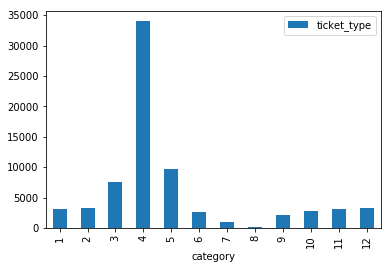

In [4]:
# Distribution of label in different categories
ticketdata[['ticket_type','category']].groupby('category').count().plot.bar()
plt.show()

In [5]:
# Saving Category into Y
Y = ticketdata['category'].copy()
ticketdata_df = ticketdata.drop(columns='category')

In [6]:
# Create Single Column from title and body
ticketdata_df['Email_Thread'] = ticketdata_df.title.astype(str).str.cat(ticketdata_df.body.astype(str), sep=' ')
ticketdata_df.drop(['title','body'], axis = 1, inplace=True)

In [7]:
ticketdata_df.head()

,ticket_type,business_service,urgency,impact,Email_Thread
0,1,71,3,4,hi since recruiter lead permission approve re...
1,1,26,3,4,connection with icon icon dear please setup ic...
2,1,32,3,4,work experience user work experience user hi w...
3,1,32,3,4,requesting for meeting requesting meeting hi p...
4,1,4,3,4,reset passwords for external accounts re expir...


#### Creating function for Tokenizing and Stemming the Email_Thread

In [8]:
# Convert word to its root 
ps = PorterStemmer()

def tokenStem(text):
    words = word_tokenize(text)
    word=[ps.stem(item) for item in words if len(item) > 2]
    return word

In [9]:
ticketdata_df.head()


,ticket_type,business_service,urgency,impact,Email_Thread
0,1,71,3,4,hi since recruiter lead permission approve re...
1,1,26,3,4,connection with icon icon dear please setup ic...
2,1,32,3,4,work experience user work experience user hi w...
3,1,32,3,4,requesting for meeting requesting meeting hi p...
4,1,4,3,4,reset passwords for external accounts re expir...


In [11]:
text_data = np.array(ticketdata_df['Email_Thread'])

In [12]:
text_data

array([' hi since recruiter lead permission approve requisitions makes please make thanks recruiter',
       'connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead',
       'work experience user work experience user hi work experience student coming next his name much appreciate him duration thank',
       ...,
       'warning for complains to be de activated complaint should not have sent tuesday incident warning for hi guys can below warnings be activated please there should be attached tm complaints thank you manager sent tuesday incident warning for sent tuesday incident warning for ticket close breaching customer feedback owners please be advised following ticket close breaching customer feedback owners reference number customer summary hub feedback software request performed erroneously by priority low resolution target date assigned engineer ref msg',
       'notifications not sent to all members when tickets assigned to 

#### Creating bag of words by removing Stop Words, doing CountVectorizer

In [13]:
count = CountVectorizer(tokenizer=tokenStem, analyzer='word',stop_words ='english',ngram_range= (1, 1),min_df=1000)
bag_of_words = count.fit_transform(text_data)

# Show feature matrix

C:\Users\kaam8004\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv']

In [14]:
count.get_feature_names()

['abl',
 'abov',
 'absenc',
 'accept',
 'access',
 'accordingli',
 'account',
 'action',
 'activ',
 'ad',
 'add',
 'addit',
 'address',
 'adjust',
 'administr',
 'advis',
 'alloc',
 'allow',
 'alreadi',
 'analyst',
 'ani',
 'announc',
 'annual',
 'answer',
 'anyon',
 'appear',
 'applic',
 'appreci',
 'approv',
 'area',
 'ask',
 'assign',
 'assist',
 'attach',
 'author',
 'autom',
 'automat',
 'avail',
 'avoid',
 'award',
 'basi',
 'becaus',
 'befor',
 'best',
 'brand',
 'breach',
 'breakdown',
 'button',
 'cabl',
 'canada',
 'canari',
 'capac',
 'card',
 'care',
 'career',
 'carryov',
 'cascad',
 'case',
 'catalogu',
 'caus',
 'center',
 'chang',
 'check',
 'choos',
 'client',
 'close',
 'code',
 'colleagu',
 'come',
 'comment',
 'commun',
 'compani',
 'complaint',
 'complet',
 'comput',
 'confidenti',
 'configur',
 'confirm',
 'confluenc',
 'connect',
 'consequ',
 'consid',
 'consider',
 'consult',
 'consum',
 'contact',
 'contain',
 'content',
 'continu',
 'control',
 'copi',
 'corre

In [15]:
print(bag_of_words)

  (0, 400)	1
  (0, 291)	1
  (0, 229)	2
  (0, 28)	1
  (0, 286)	1
  (0, 206)	1
  (0, 370)	1
  (1, 254)	1
  (1, 211)	1
  (1, 126)	1
  (1, 367)	1
  (1, 101)	1
  (1, 79)	1
  (1, 400)	1
  (1, 291)	2
  (1, 206)	1
  (2, 27)	1
  (2, 173)	1
  (2, 68)	1
  (2, 426)	2
  (2, 444)	3
  (2, 400)	1
  (3, 48)	1
  (3, 150)	1
  (3, 170)	1
  :	:
  (72796, 365)	2
  (72796, 151)	1
  (72796, 3)	1
  (72796, 265)	1
  (72796, 424)	3
  (72796, 22)	1
  (72796, 62)	3
  (72796, 152)	2
  (72796, 362)	3
  (72796, 169)	1
  (72796, 10)	1
  (72796, 135)	1
  (72796, 414)	1
  (72796, 198)	2
  (72796, 222)	2
  (72796, 19)	1
  (72796, 221)	1
  (72796, 327)	2
  (72796, 199)	1
  (72796, 174)	1
  (72796, 180)	1
  (72796, 67)	1
  (72796, 339)	3
  (72796, 400)	3
  (72796, 291)	3


#### Tfidf Transformer on Email_Thread

In [16]:
tf =TfidfTransformer(smooth_idf=True,sublinear_tf =True)
tfid = tf.fit_transform(bag_of_words)

In [17]:
tf_df = pd.SparseDataFrame([ pd.SparseSeries(tfid[i].toarray().ravel()) 
                              for i in np.arange(tfid.shape[0]) ], columns = count.get_feature_names())

In [18]:
tf_df.head()

,abl,abov,absenc,accept,access,accordingli,account,action,activ,ad,...,week,weekli,wharf,win,window,work,write,wrongli,wrote,year
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.505627,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.069362,0.0,0.096286,0.0,0.110346,0.0,...,0.0,0.0,0.0,0.0,0.125035,0.000000,0.0,0.0,0.0,0.0


In [19]:
ticketdata_df.drop(['Email_Thread'], axis = 1, inplace=True)

In [20]:
ticketdata_df.head()

,ticket_type,business_service,urgency,impact
0,1,71,3,4
1,1,26,3,4
2,1,32,3,4
3,1,32,3,4
4,1,4,3,4


#### Scaling input data(0-1) using MinMaxScaler

In [21]:
min_max = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
ticketdata_df= min_max.fit_transform(ticketdata_df)

In [22]:
df=pd.DataFrame(data=ticketdata_df[0:,0:],index=[i for i in range(ticketdata_df.shape[0])],columns = ['ticket_type','business_service', 'urgency', 'impact'] )

In [23]:
df = df.join(tf_df)

#### Train Test data split

In [24]:
raw_data, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.33, random_state=42)

#### XGBClassifier for classification

In [25]:
finclf=xgb.XGBClassifier(early_stopping_rounds=5,n_jobs=4, learning_rate=0.05, max_depth=6, n_estimators=1000, subsample=0.8)

In [26]:
# Training dataset
finclf.fit(raw_data, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=5,
              gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=4,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [60]:
# Test dataset
pred= finclf.predict(X_test)

In [28]:
X_test.columns

Index(['ticket_type', 'business_service', 'urgency', 'impact', 'abl', 'abov',
       'absenc', 'accept', 'access', 'accordingli',
       ...
       'week', 'weekli', 'wharf', 'win', 'window', 'work', 'write', 'wrongli',
       'wrote', 'year'],
      dtype='object', length=453)

In [29]:
np.mean(pred == y_test)

0.9465534465534465

#### Precision, Recall, F-Score and Accuracy

In [30]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred)

In [31]:
score = accuracy_score(y_test, pred)

In [32]:

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('\n\nTotal Accuracy on test data {0:.2f}%'.format(score*100))

precision: [0.9952741  1.         0.98704453 0.9393913  0.91495017 0.81744966
 0.73421927 0.97101449 0.99449036 1.         0.93480257 0.99716178]
recall: [1.         1.         1.         0.96109921 0.86904386 0.65273312
 0.72697368 0.72043011 1.         1.         1.         1.        ]
fscore: [0.99763145 1.         0.99348003 0.95012128 0.89140638 0.72586412
 0.73057851 0.82716049 0.99723757 1.         0.9663028  0.99857887]


Total Accuracy on test data 94.66%


#### Feature Importance plot

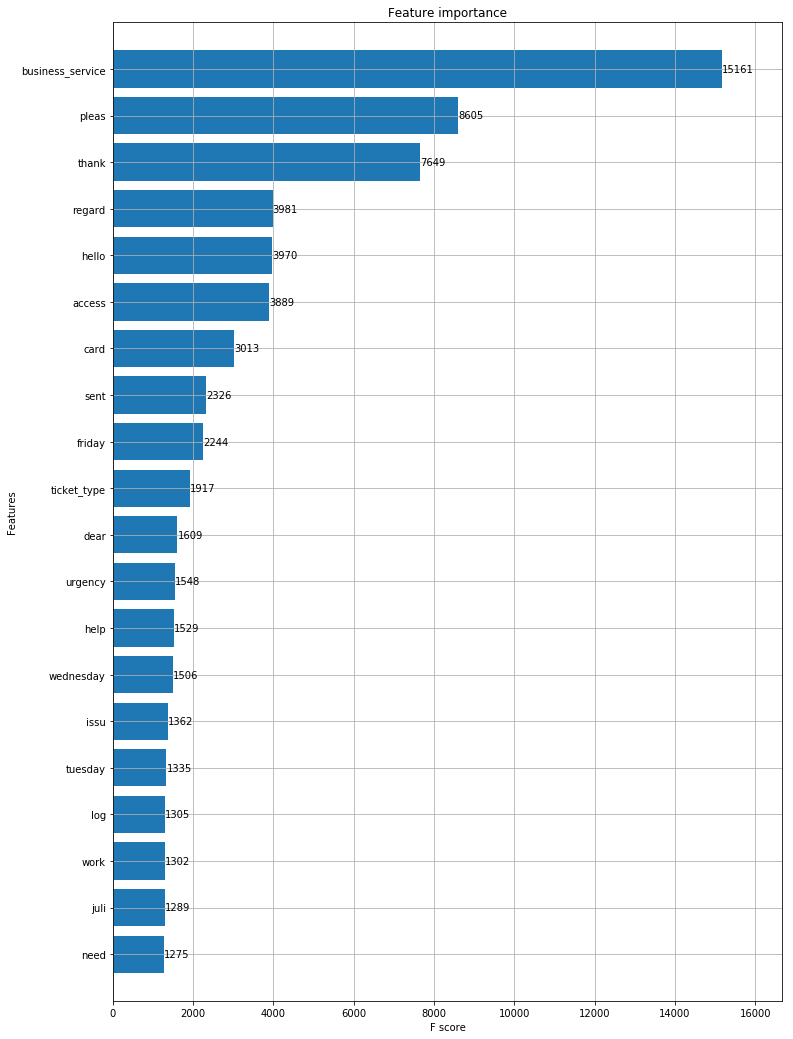

In [33]:
# Feature names will be populate when code will run next time
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(finclf, max_num_features=20, height=0.8, ax=ax)
plt.show()

#### Visualizing Xgboost decision tree

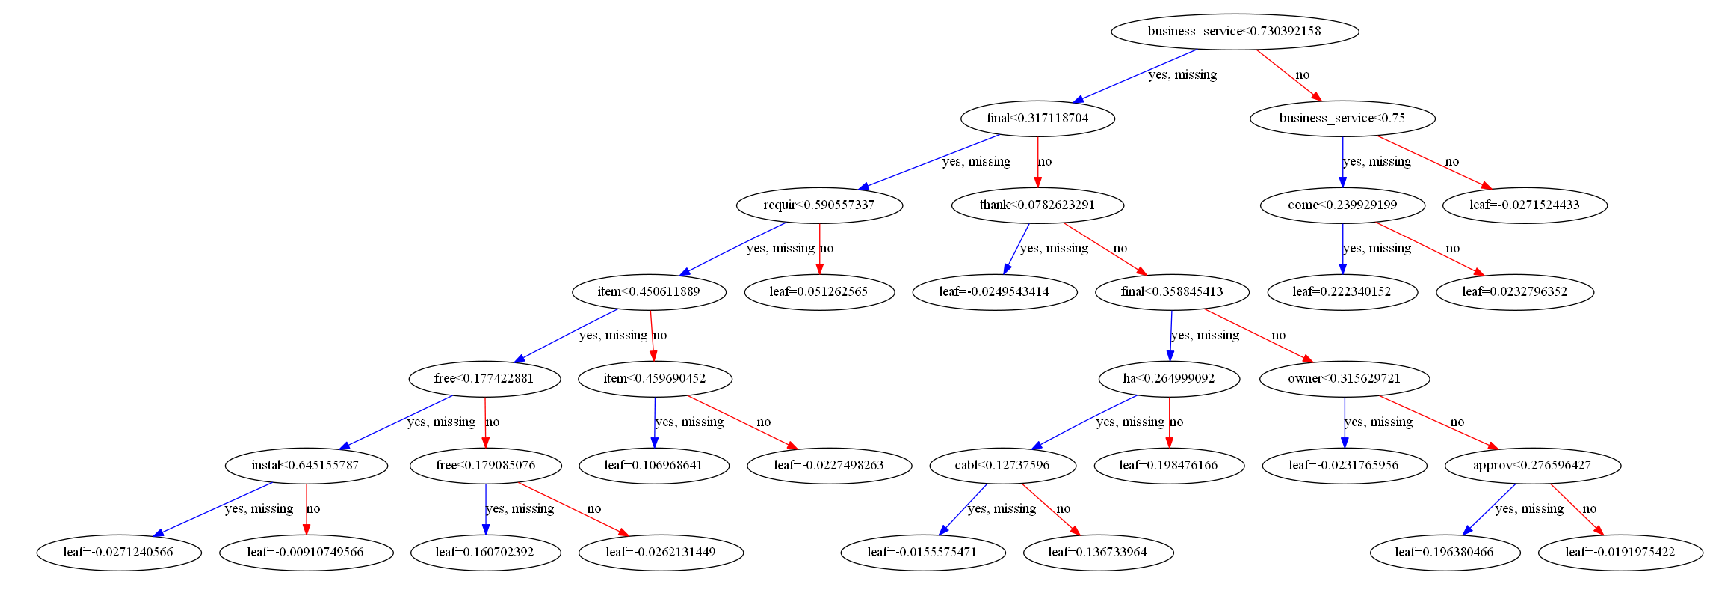

In [36]:
plot_tree(finclf,num_trees=20)
fig= plt.gcf()
fig.set_size_inches(30,15)

### Demo of New Ticket Data to Check it's Classification of Category

In [85]:
input_df = pd.read_csv(r'C:\Users\kaam8004\Desktop\HARRY POTTER\input_to_model.csv')

In [86]:
input_df.head()

,title,body,ticket_type,business_service,urgency,impact
0,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,3,4
1,access card,re card va se,1,73,3,4
2,remove key sensitive from oracle fusion when l...,friday pm key sensitive looking select locatio...,1,68,3,4


In [87]:
# Create Single Column from title and body
input_df['Email_Thread'] = input_df.title.astype(str).str.cat(input_df.body.astype(str), sep=' ')
input_df.drop(['title','body'], axis = 1, inplace=True)
text_data_ip = np.array(input_df['Email_Thread'])
bag_of_words_ip = count.transform(text_data_ip)
tfid_ip = tf.transform(bag_of_words_ip)
tf_df_ip = pd.SparseDataFrame([ pd.SparseSeries(tfid_ip[i].toarray().ravel()) 
                              for i in np.arange(tfid_ip.shape[0]) ], columns = count.get_feature_names())
input_df.drop(['Email_Thread'], axis = 1, inplace=True)
input_df= min_max.transform(input_df)
df_ip=pd.DataFrame(data=input_df[0:,0:],index=[i for i in range(input_df.shape[0])],columns = ['ticket_type','business_service', 'urgency', 'impact'] )
df_ip = df_ip.join(tf_df_ip)


In [88]:
pred_ip= finclf.predict(df_ip)

In [89]:
pred_ip

array([ 4,  7, 10], dtype=int64)